In [22]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

In [42]:
# initial conditions
num_qubits = 5
j = 1.0
h = 0.7

# define initial states
initial_states = tensor([basis(2,0) for _ in range(num_qubits)])

# define oprs for H
def embed_single(i, op, N):
    ops = [qeye(2)] * N
    ops[i] = op
    return tensor(ops)

def embed_pair(i, j, op_i, op_j, N):
    ops = [qeye(2)] * N
    ops[i] = op_i
    ops[j] = op_i
    return tensor(ops)
    
#define TFIM for Hamiltonian
for i in range(num_qubits -1):
    H += -J * embed_pair(i, i+1, sigmaz(),sigmaz(), num_qubits)
    
for i in range(num_qubits):
    H += -h * embed_single(i, sigmax(), num_qubits)

# define interaction time
time = np.linspace(0,50,1000)

#collapse opr
c_ops = [
    np.sqrt(0.1) * tensor([destroy(2) if i==j else qeye(2) for j in range(num_qubits)])
]

# expectations values 
e_ops =[
    tensor([sigmaz() if i==j else qeye(2) for j in range(num_qubits)])
    for i in range(num_qubits)
]

# solve with master equation
result = mesolve(H, initial_states, time, c_ops, e_ops)

In [43]:
result.expect[-1]

array([ 1.00000000e+00,  8.20680104e-01,  4.71566158e-01,  2.80194533e-01,
        3.33217602e-01,  4.50831688e-01,  4.78022561e-01,  4.50915012e-01,
        4.64336787e-01,  5.11499467e-01,  5.24173242e-01,  4.85829617e-01,
        4.20405912e-01,  3.14702852e-01,  1.40504569e-01, -5.00273078e-02,
       -1.24710201e-01, -3.91646483e-03,  2.27380536e-01,  3.66485148e-01,
        2.67755544e-01, -1.51731072e-02, -2.67583636e-01, -3.22938178e-01,
       -2.36113192e-01, -2.06686109e-01, -3.20938597e-01, -4.39119874e-01,
       -3.90408766e-01, -2.15382990e-01, -1.18928595e-01, -2.09420139e-01,
       -3.96699870e-01, -5.55736372e-01, -6.65315237e-01, -7.27533035e-01,
       -6.71740399e-01, -4.63244208e-01, -2.45477568e-01, -2.25523694e-01,
       -4.09471442e-01, -5.75384873e-01, -5.53734069e-01, -4.33783157e-01,
       -4.17407362e-01, -5.38123390e-01, -6.23488790e-01, -5.19167742e-01,
       -2.67631108e-01, -4.99129365e-02, -4.10113081e-03, -1.22149413e-01,
       -2.86932616e-01, -

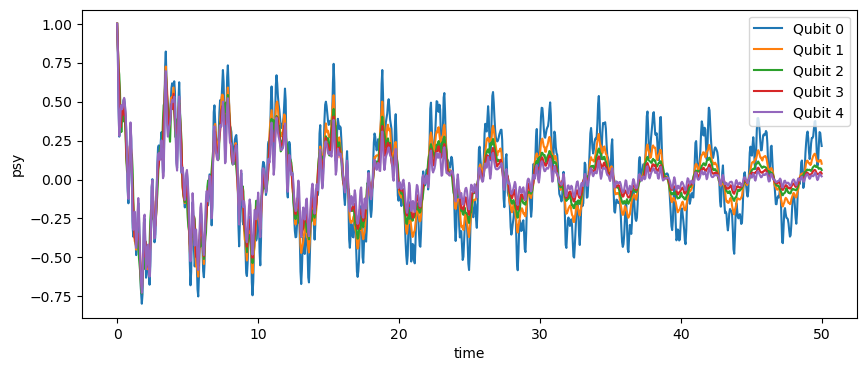

In [46]:
plt.figure(figsize = (10,4), dpi = 100)
for i in range(num_qubits):
    plt.plot(time, result.expect[i], label='Qubit '+str(i))
    plt.xlabel('time')
    plt.ylabel('psy')
    plt.legend()
    #plt.show()